In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

In [6]:

X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

In [7]:

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("\nShapes of Train and Test Splits:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Shapes of Train and Test Splits:
X_train: (538, 8), X_test: (230, 8)
y_train: (538,), y_test: (230,)


In [8]:
# Step 4: Implementing KNN from Scratch

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=3):
    return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    return (correct_predictions / total_predictions) * 100

In [10]:

predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"\nAccuracy of KNN model with k=3: {accuracy:.2f}%")



Accuracy of KNN model with k=3: 67.39%


In [11]:
# Problem 2

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

print(f"\nAccuracy of KNN model with scaled data and k=3: {accuracy_scaled:.2f}%")


print(f"\nComparison of Accuracy:\nOriginal Data: {accuracy:.2f}%\nScaled Data: {accuracy_scaled:.2f}%")


Accuracy of KNN model with scaled data and k=3: 70.87%

Comparison of Accuracy:
Original Data: 67.39%
Scaled Data: 70.87%


k=1: Accuracy=68.70%, Time=2.3166s
k=2: Accuracy=72.61%, Time=0.8056s
k=3: Accuracy=67.39%, Time=0.8070s
k=4: Accuracy=72.17%, Time=0.8137s
k=5: Accuracy=68.70%, Time=0.8074s
k=6: Accuracy=70.00%, Time=0.7992s
k=7: Accuracy=69.13%, Time=0.7973s
k=8: Accuracy=71.30%, Time=0.8043s
k=9: Accuracy=70.00%, Time=0.7845s
k=10: Accuracy=71.74%, Time=0.8288s
k=11: Accuracy=73.04%, Time=0.7878s
k=12: Accuracy=73.91%, Time=0.7863s
k=13: Accuracy=74.35%, Time=0.8808s
k=14: Accuracy=72.61%, Time=1.3877s
k=15: Accuracy=73.91%, Time=1.4352s
k=1: Accuracy=63.48%, Time=0.8996s
k=2: Accuracy=66.09%, Time=0.7961s
k=3: Accuracy=70.87%, Time=0.7863s
k=4: Accuracy=68.70%, Time=0.7791s
k=5: Accuracy=70.00%, Time=0.8094s
k=6: Accuracy=69.13%, Time=0.7868s
k=7: Accuracy=69.57%, Time=0.7817s
k=8: Accuracy=68.70%, Time=0.7901s
k=9: Accuracy=69.57%, Time=0.7989s
k=10: Accuracy=69.57%, Time=0.8892s
k=11: Accuracy=70.87%, Time=0.8033s
k=12: Accuracy=72.17%, Time=0.7925s
k=13: Accuracy=71.30%, Time=1.1205s
k=14: Accu

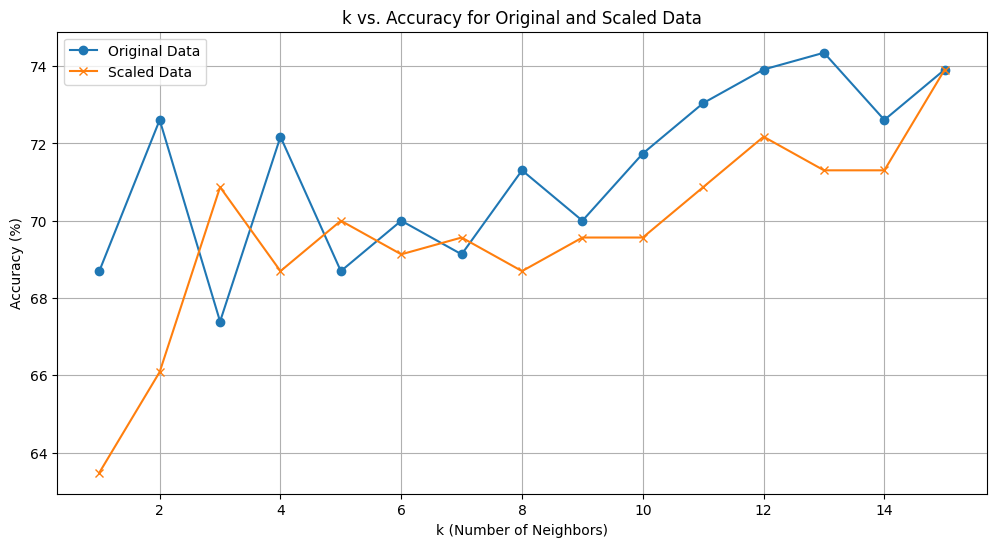

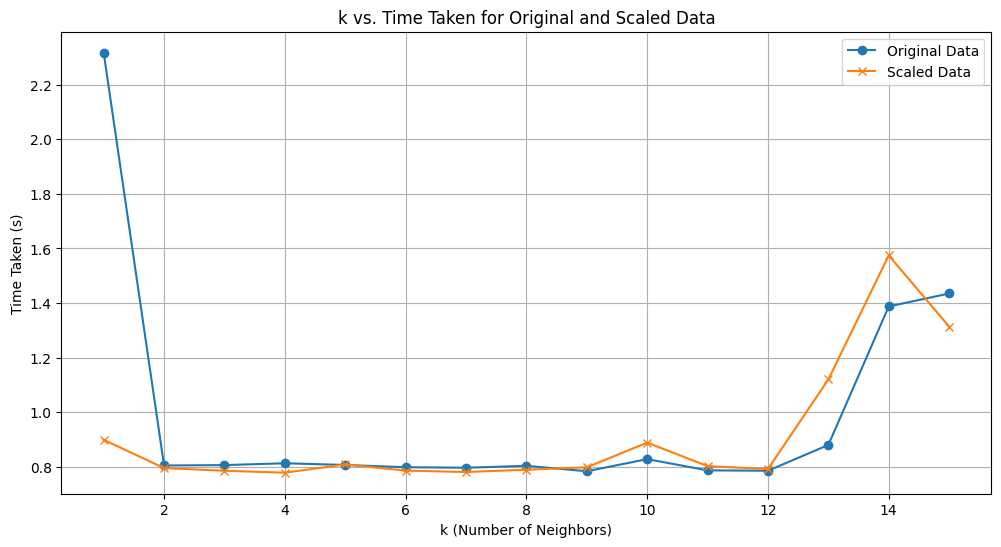

In [12]:
# Problem 3

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}
    times = {}
    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        accuracy = compute_accuracy(y_test, predictions)
        end_time = time.time()

        accuracies[k] = accuracy
        times[k] = end_time - start_time
        print(f"k={k}: Accuracy={accuracy:.2f}%, Time={times[k]:.4f}s")

    return accuracies, times


k_values = range(1, 16)
accuracies_original, times_original = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)

accuracies_scaled, times_scaled = experiment_knn_k_values(X_train_scaled, y_train, X_test_scaled, y_test, k_values)

plt.figure(figsize=(12, 6))
plt.plot(k_values, list(accuracies_original.values()), marker='o', label='Original Data')
plt.plot(k_values, list(accuracies_scaled.values()), marker='x', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy for Original and Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_values, list(times_original.values()), marker='o', label='Original Data')
plt.plot(k_values, list(times_scaled.values()), marker='x', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (s)')
plt.title('k vs. Time Taken for Original and Scaled Data')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Problem 4: Additional Questions
print("\nChallenges of KNN:")
print("1. Computational Cost: High computational cost for large datasets due to distance calculations.")
print("2. Curse of Dimensionality: Distance metrics become less meaningful in high-dimensional spaces.")

print("\nStrategies to Improve Efficiency:")
print("1. Use approximate nearest neighbors algorithms (e.g., KD-Trees, Ball Trees).")
print("2. Reduce dimensions using techniques like PCA.")
print("3. Use parallel computing or GPUs for faster computations.")



Challenges of KNN:
1. Computational Cost: High computational cost for large datasets due to distance calculations.
2. Curse of Dimensionality: Distance metrics become less meaningful in high-dimensional spaces.

Strategies to Improve Efficiency:
1. Use approximate nearest neighbors algorithms (e.g., KD-Trees, Ball Trees).
2. Reduce dimensions using techniques like PCA.
3. Use parallel computing or GPUs for faster computations.
